In [1]:
# Importing libraries

import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# convert file to csv

with open('wdbc.data', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('wdbc.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('id','diagnosis','mradius', 'mtexture','mperimeter',
                         'marea','msmoothness','mcompactness','mconcavity','mconcavepoints','msymmetry','mfractaldimension',
                         'seradius', 'setexture','seperimeter',
                         'searea','sesmoothness','secompactness','seconcavity','seconcavepoints','sesymmetry','sefractaldimension',
                         'wradius', 'wtexture','wperimeter',
                         'warea','wsmoothness','wcompactness','wconcavity','wconcavepoints','wsymmetry','wfractaldimension'))
        writer.writerows(lines)

In [3]:
df = pd.read_csv("wdbc.csv")
print(df.head())


         id diagnosis  mradius  mtexture  mperimeter   marea  msmoothness  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   mcompactness  mconcavity  mconcavepoints  ...  wradius  wtexture  \
0       0.27760      0.3001         0.14710  ...    25.38     17.33   
1       0.07864      0.0869         0.07017  ...    24.99     23.41   
2       0.15990      0.1974         0.12790  ...    23.57     25.53   
3       0.28390      0.2414         0.10520  ...    14.91     26.50   
4       0.13280      0.1980         0.10430  ...    22.54     16.67   

   wperimeter   warea  wsmoothness  wcompactness  wconcavity  wconcavepoints  \
0      184.60  2019.0       0.

In [4]:
# remove id column
df = df.drop(['id'], axis=1)
df

,diagnosis,mradius,mtexture,mperimeter,marea,msmoothness,mcompactness,mconcavity,mconcavepoints,msymmetry,...,wradius,wtexture,wperimeter,warea,wsmoothness,wcompactness,wconcavity,wconcavepoints,wsymmetry,wfractaldimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# set data columns and separate sets of benign and malignant
data_cols = [col for col in df.columns if col != "diagnosis"]
data_benign = df[df["diagnosis"] == "B"]
data_malignant = df[df["diagnosis"] == "M"]

data_benign, data_malignant

(    diagnosis  mradius  mtexture  mperimeter  marea  msmoothness  \
 19          B   13.540     14.36       87.46  566.3      0.09779   
 20          B   13.080     15.71       85.63  520.0      0.10750   
 21          B    9.504     12.44       60.34  273.9      0.10240   
 37          B   13.030     18.42       82.61  523.8      0.08983   
 46          B    8.196     16.84       51.71  201.9      0.08600   
 ..        ...      ...       ...         ...    ...          ...   
 558         B   14.590     22.68       96.39  657.1      0.08473   
 559         B   11.510     23.93       74.52  403.5      0.09261   
 560         B   14.050     27.15       91.38  600.4      0.09929   
 561         B   11.200     29.37       70.67  386.0      0.07449   
 568         B    7.760     24.54       47.92  181.0      0.05263   
 
      mcompactness  mconcavity  mconcavepoints  msymmetry  ...  wradius  \
 19        0.08129     0.06664        0.047810     0.1885  ...   15.110   
 20        0.12700  

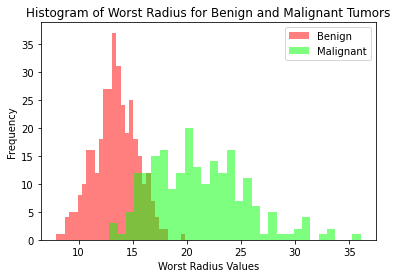

Most frequent malignant radius mean is:  19.8


In [6]:
# worst radius histogram

b = plt.hist(data_benign.wradius,bins=30,fc = (1,0,0,0.5),label = "Benign")
m = plt.hist(data_malignant.wradius,bins=30,fc = (0,1,0,0.5),label = "Malignant")
plt.legend()
plt.xlabel("Worst Radius Values")
plt.ylabel("Frequency")
plt.title("Histogram of Worst Radius for Benign and Malignant Tumors")
plt.show()

frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)


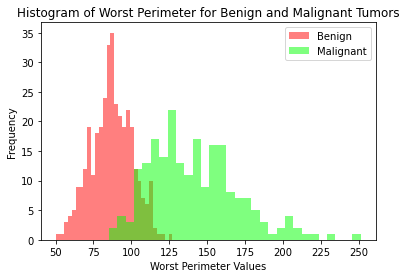

Most frequent malignant worst perimeter is:  123.85666666666665


In [7]:
# worst perimiter histogram

b = plt.hist(data_benign.wperimeter,bins=30,fc = (1,0,0,0.5),label = "Benign")
m = plt.hist(data_malignant.wperimeter,bins=30,fc = (0,1,0,0.5),label = "Malignant")
plt.legend()
plt.xlabel("Worst Perimeter Values")
plt.ylabel("Frequency")
plt.title("Histogram of Worst Perimeter for Benign and Malignant Tumors")
plt.show()

frequent_malignant_wperimeter = m[0].max()
index_frequent_malignant_wperimeter = list(m[0]).index(frequent_malignant_wperimeter)
most_frequent_malignant_wperimeter = m[1][index_frequent_malignant_wperimeter]
print("Most frequent malignant worst perimeter is: ",most_frequent_malignant_wperimeter)

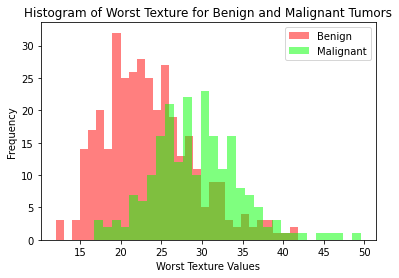

Most frequent malignant worst texture is:  29.818


In [8]:
# worst texture histogram

b = plt.hist(data_benign.wtexture,bins=30,fc = (1,0,0,0.5),label = "Benign")
m = plt.hist(data_malignant.wtexture,bins=30,fc = (0,1,0,0.5),label = "Malignant")
plt.legend()
plt.xlabel("Worst Texture Values")
plt.ylabel("Frequency")
plt.title("Histogram of Worst Texture for Benign and Malignant Tumors")
plt.show()

frequent_malignant_wtexture = m[0].max()
index_frequent_malignant_wtexture = list(m[0]).index(frequent_malignant_wtexture)
most_frequent_malignant_wtexture = m[1][index_frequent_malignant_wtexture]
print("Most frequent malignant worst texture is: ",most_frequent_malignant_wtexture)


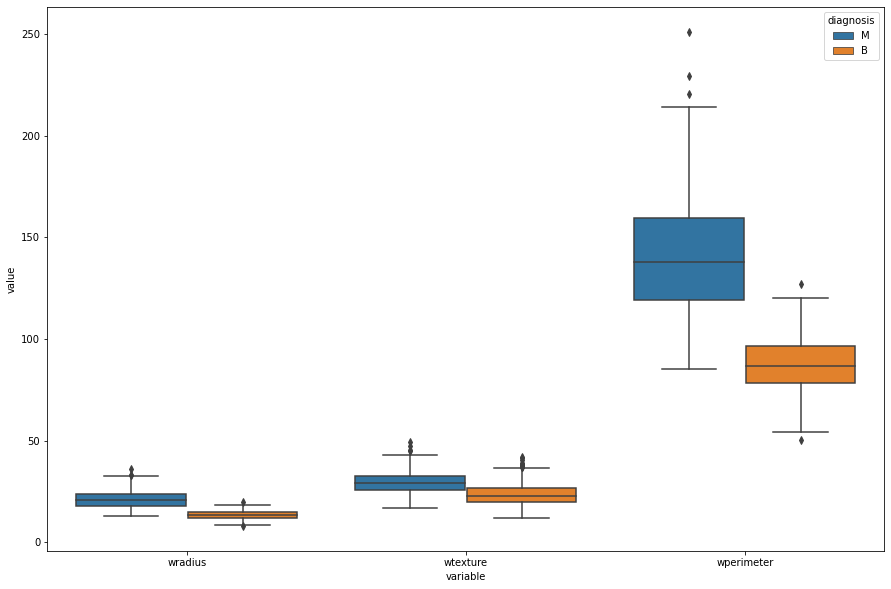

In [9]:
# box plot 
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['wradius', 'wtexture', 'wperimeter'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()


In [10]:
# convert diagnosis column to 0 or 1
df.loc[df['diagnosis'] == "M", ['diagnosis']] = 1
df.loc[df['diagnosis'] == "B", ['diagnosis']] = 0
df

,diagnosis,mradius,mtexture,mperimeter,marea,msmoothness,mcompactness,mconcavity,mconcavepoints,msymmetry,...,wradius,wtexture,wperimeter,warea,wsmoothness,wcompactness,wconcavity,wconcavepoints,wsymmetry,wfractaldimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


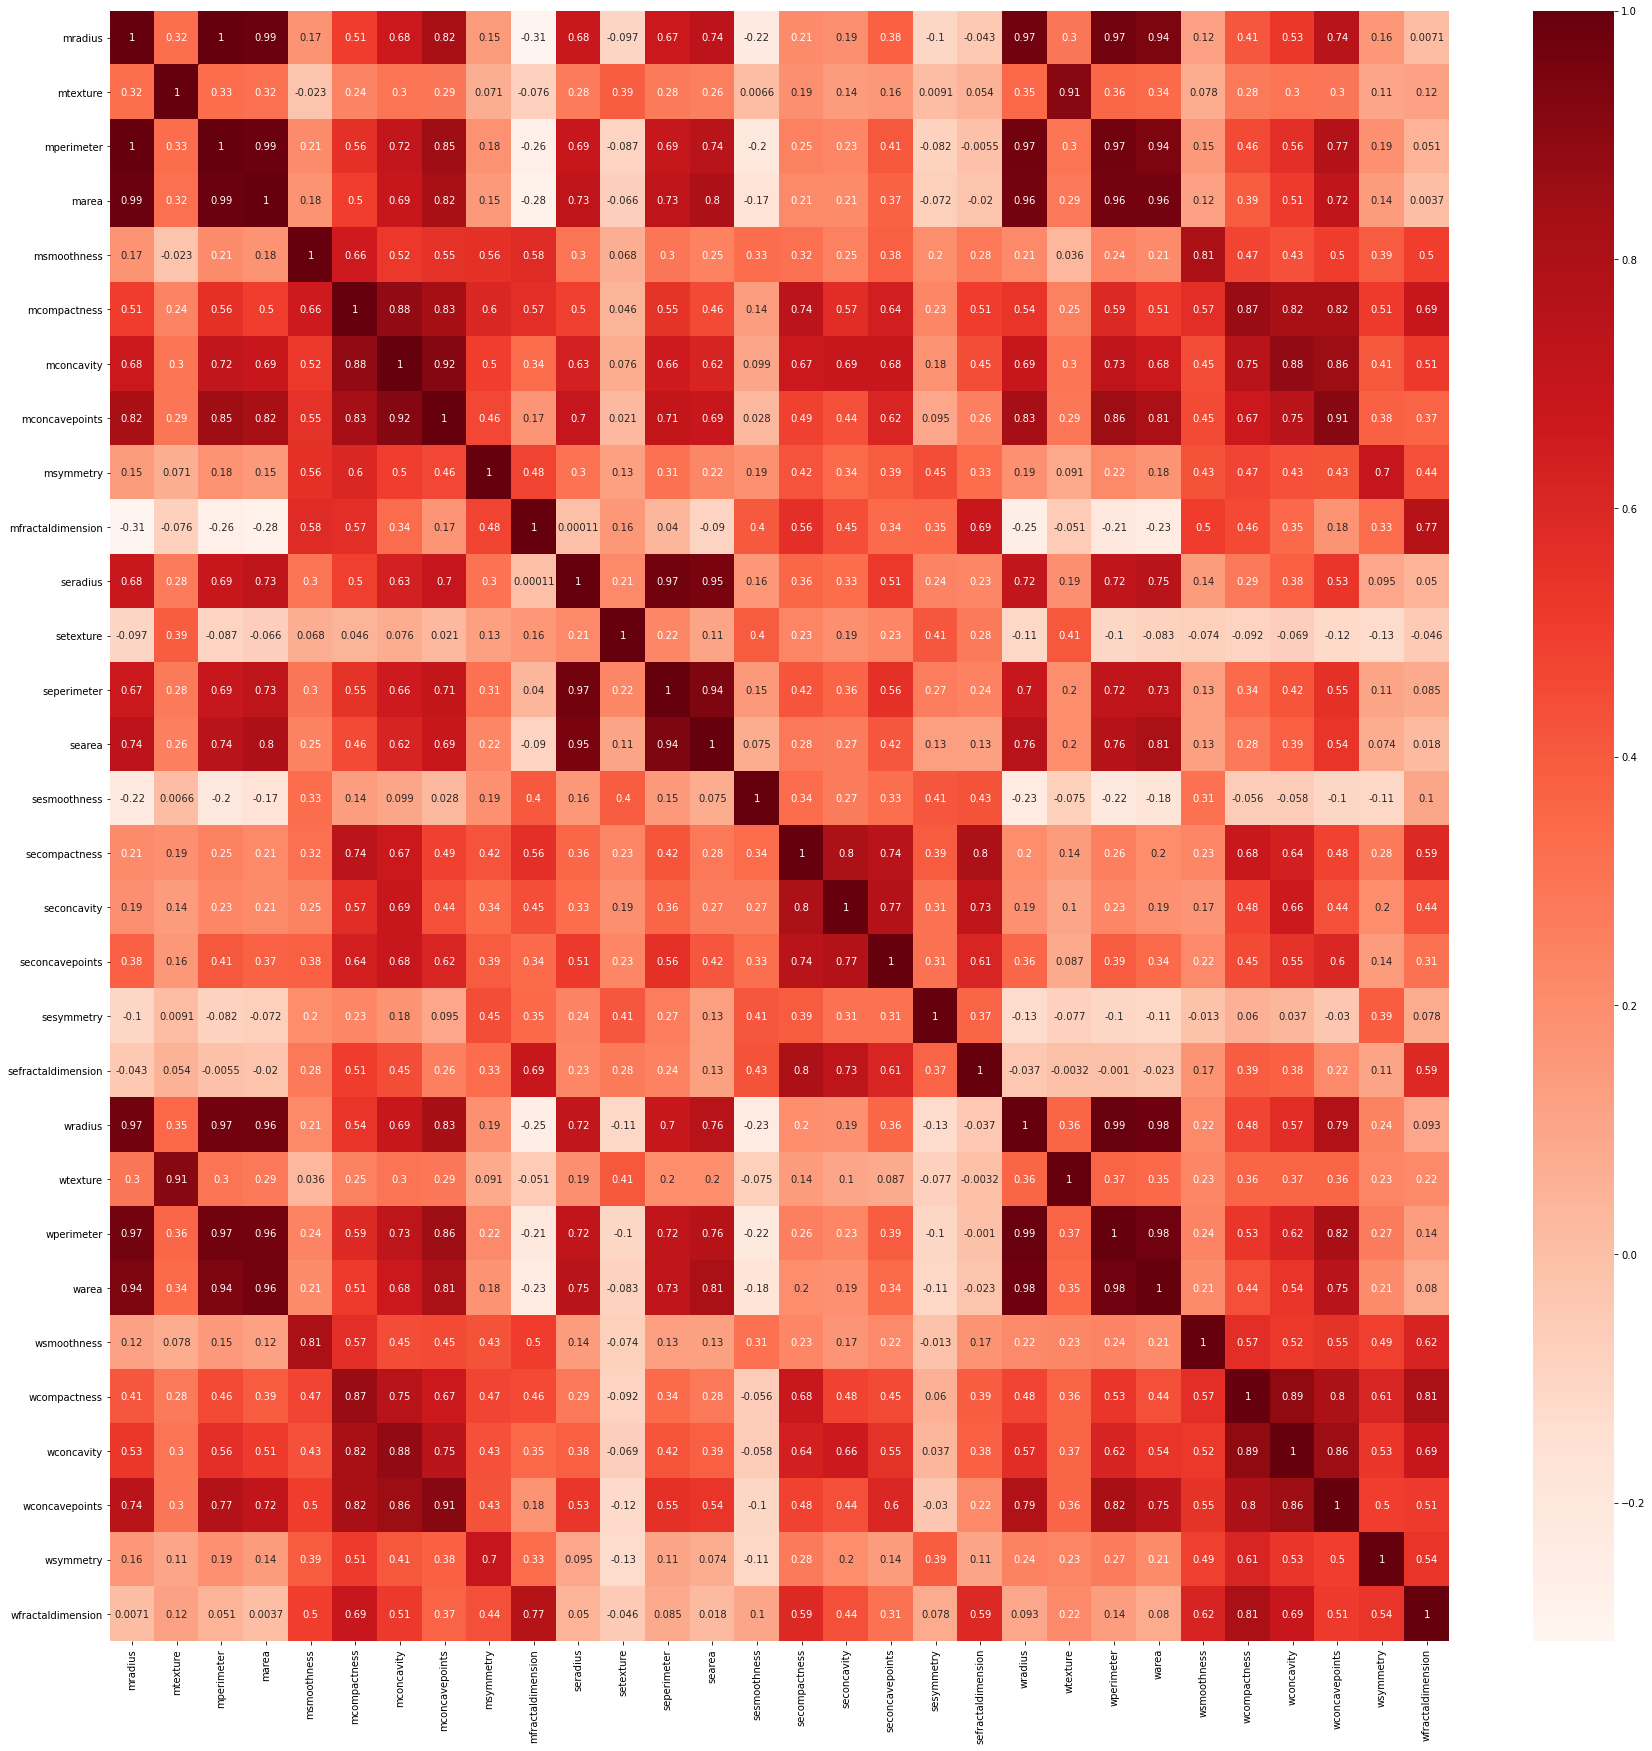

In [11]:
# 1.2 Select correlated variables

# Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [12]:
cor_target = abs(cor["diagnosis"])

# Selecting highly correlated features
irrelevant_features = cor_target[cor_target<0.5]
print(irrelevant_features)

df = df.drop(["mtexture","msmoothness","msymmetry","mfractaldimension",
             "setexture","sesmoothness","secompactness","seconcavity",
             "seconcavepoints","sesymmetry","sefractaldimension","wtexture",
             "wsmoothness","wsymmetry","msymmetry","wfractaldimension"], axis=1)
data_cols = [col for col in df.columns if col != "diagnosis"]

df_shfl = shuffle(df, random_state=443)
X = df_shfl[data_cols].values
y = df_shfl["diagnosis"].values

KeyError: 'diagnosis'

In [ ]:
# Selecting highly correlated features
irrelevant_features = cor_target[cor_target<0.5]
print(irrelevant_features)

df = df.drop(["mtexture","msmoothness","msymmetry","mfractaldimension",
             "setexture","sesmoothness","secompactness","seconcavity",
             "seconcavepoints","sesymmetry","sefractaldimension","wtexture",
             "wsmoothness","wsymmetry","msymmetry","wfractaldimension"], axis=1)
data_cols = [col for col in df.columns if col != "diagnosis"]

df_shfl = shuffle(df, random_state=443)
X = df_shfl[data_cols].values
y = df_shfl["diagnosis"].values

In [ ]:
# create test and training variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [ ]:
# 1.3 Support Vector Machine


svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("Support Vector Machine Results")
print(classification_report(y_test,y_pred))

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
cm




In [ ]:
# 1.4 Random Forest

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)

print("Random Forest Results")
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["T", "F"], index=["P", "N"])
print("Accuracy = %.2f%%" % ((cm.iloc[1, 1] + cm.iloc[0, 0]) / cm.values.sum() * 100))
print(cm)